# Stack Overflow: Tag Prediction

# 1. Business Problem




Stack Overflow is the largest, most trusted online community for developers to learn, share their programming knowledge, and build their careers.Stack Overflow is something which every programmer use one way or another. Each month, over 50 million developers come to Stack Overflow to learn, share their knowledge, and build their careers. 
It features questions and answers on a wide range of topics in computer programming. The website serves as a platform for users to ask and answer questions, and, through membership and active participation, to vote questions and answers up or down and edit questions and answers in a fashion similar to a wiki or Digg. As of April 2014 Stack Overflow has over 4,000,000 registered users, and it exceeded 10,000,000 questions in late August 2015. Based on the type of tags assigned to questions, the top eight most discussed topics on the site are: Java, JavaScript, C#, PHP, Android, jQuery, Python and HTML.

# 1.1 Problem Statemtent



Suggest the tags based on the content that was there in the question posted on Stackoverflow.
Source: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/

# 1.2 Source



Data Source : https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 
  


# 1.3 Real World / Business Objectives and Constraints



Predict as many tags as possible with high precision and recall.
Incorrect tags could impact customer experience on StackOverflow.
No strict latency constraints.

# 2. Machine Learning problem


Refer: https://www.kaggle.com/c/facebook-recruiting-iii-keyword-extraction/data 

All of the data is in 2 files: Train and Test.
1. Train.csv contains 4 columns: Id,Title,Body,Tags.
2. Test.csv contains the same columns but without the Tags, which you are to predict.
3. Size of Train.csv - 6.75GB
4. Size of Test.csv - 2GB
5. Number of rows in Train.csv = 6034195

The questions are randomized and contains a mix of verbose text sites as well as sites related to math and programming. The number of questions from each site may vary, and no filtering has been performed on the questions (such as closed questions).


# 2.2.1 Data Field Explaination:



Dataset contains 6,034,195 rows. The columns in the table are:

Id - Unique identifier for each question
Title - The question's title
Body - The body of the question
Tags - The tags associated with the question in a space-seperated format (all lowercase, should not contain tabs '\t' or ampersands '&')

# 2.2.2 Type of Machine Learning Problem




It is a multi-label classification problem 

Multi-label Classification: Multilabel classification assigns to each sample a set of target labels. This can be thought as predicting properties of a data-point that are not mutually exclusive, such as topics that are relevant for a document.


# 2.2.3 Performance metric



Micro-Averaged F1-Score (Mean F Score) : The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 (precision recall) / (precision + recall)

In the multi-class and multi-label case, this is the weighted average of the F1 score of each class. 

1. 'Micro f1 score': 
Calculate metrics globally by counting the total true positives, false negatives and false positives. This is a better metric when we have class imbalance. 

2. 'Macro f1 score': 
Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account. 


3. Hamming loss : The Hamming loss is the fraction of labels that are incorrectly predicted. 
https://www.kaggle.com/wiki/HammingLoss 

# Importing libraries

In [2]:
library(readr)
library(dplyr)
library(tm)
library(qdap)
library(tidyverse)
library(tidytext)
library(ggplot2)
library(plotly)
library(ngram)
library(wordcloud2)
library(tm.plugin.webmining)
library(corpus)
library(textclean)
library(leaflet)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Loading required package: NLP
Loading required package: qdapDictionaries
Loading required package: qdapRegex

Attaching package: 'qdapRegex'

The following object is masked from 'package:dplyr':

    explain

Loading required package: qdapTools

Attaching package: 'qdapTools'

The following object is masked from 'package:dplyr':

    id

Loading required package: RColorBrewer

Attaching package: 'qdap'

The following objects are masked from 'package:tm':

    as.DocumentTermMatrix, as.TermDocumentMatrix

The following object is masked from 'package:NLP':

    ngrams

The following object is masked from 'package:dplyr':

    %>%

The following object is masked from 'package:base':

    Filter

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.0    

# Reading Dataset

In [3]:

df=read.csv("Train_stk.csv",stringsAsFactors=FALSE)

df=df[,-c(1,2)]



In [38]:
summary(df)

    Title               Body               Tags          
 Length:943582      Length:943582      Length:943582     
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [5]:
print(paste("Dimension of Dataframe:",dim(df)))

[1] "Dimension of Dataframe: 1000000" "Dimension of Dataframe: 3"      


In [6]:

df<-df %>% distinct()



# Analysis of Tags

In [7]:
print(paste("Duplicated Questions:",length(which(duplicated(df$Title)))))
print(paste("Duplicated Tags:",length(which(duplicated(df$Tags)))))
tags_df<-data.frame(table(df$Tags))

[1] "Duplicated Questions: 3206"
[1] "Duplicated Tags: 378591"


In [8]:
print(head(tags_df[tags_df$Freq>1,]))

                     Var1 Freq
1               .htaccess  248
3  .htaccess 301-redirect    2
7       .htaccess apache2    4
26      .htaccess caching    2
32      .htaccess cakephp   10
48  .htaccess codeigniter   15


In [9]:
reviewsCorpus <- Corpus(VectorSource(df$Tags)) 
tagsDTM <- DocumentTermMatrix(reviewsCorpus)
# convert the document term matrx to a tidytext corpus
reviewsDTM_tidy <- tidy(tagsDTM)
tags<-unique(reviewsDTM_tidy$term)
print(paste("Unique tags:",length(tags)))

[1] "Unique tags: 34768"


In [10]:
frq=as.data.frame(table(reviewsDTM_tidy$term))
print(paste("Python Tags:",frq[frq=="python",]$Freq))

[1] "Python Tags: 29141"


In [11]:
head(frq)


Var1,Freq
.app,11
.aspxauth,5
.bash-profile,29
.class-file,12
.cs-file,1
.doc,9


In [12]:
fq_t<-frq[order(frq$Freq,decreasing = TRUE),]

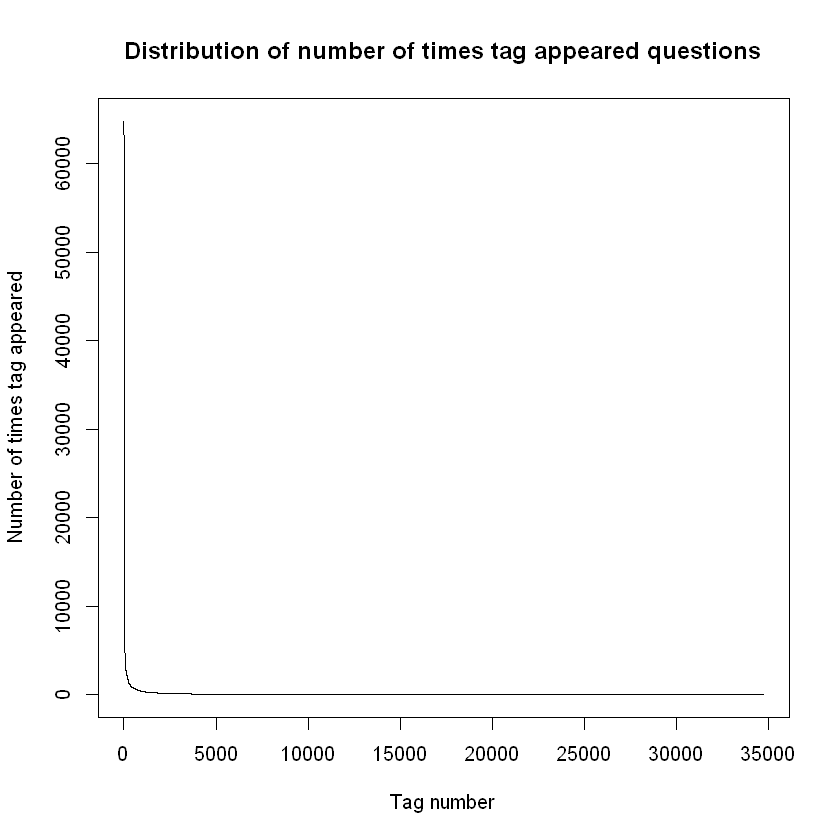

In [13]:

plot.default(fq_t$Freq,type = "l",xlab = "Tag number",
             ylab = "Number of times tag appeared",
             main="Distribution of number of times tag appeared questions")


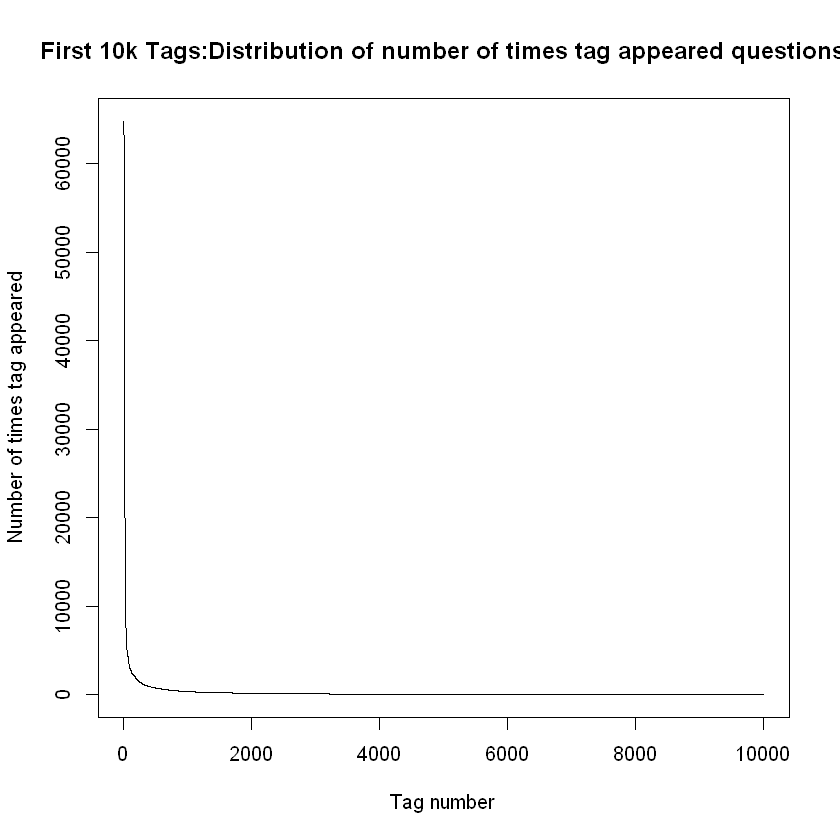

In [14]:

plot.default(fq_t$Freq[1:10000],type = "l",xlab = "Tag number",
             ylab = "Number of times tag appeared",
             main="First 10k Tags:Distribution of number of times tag appeared questions")


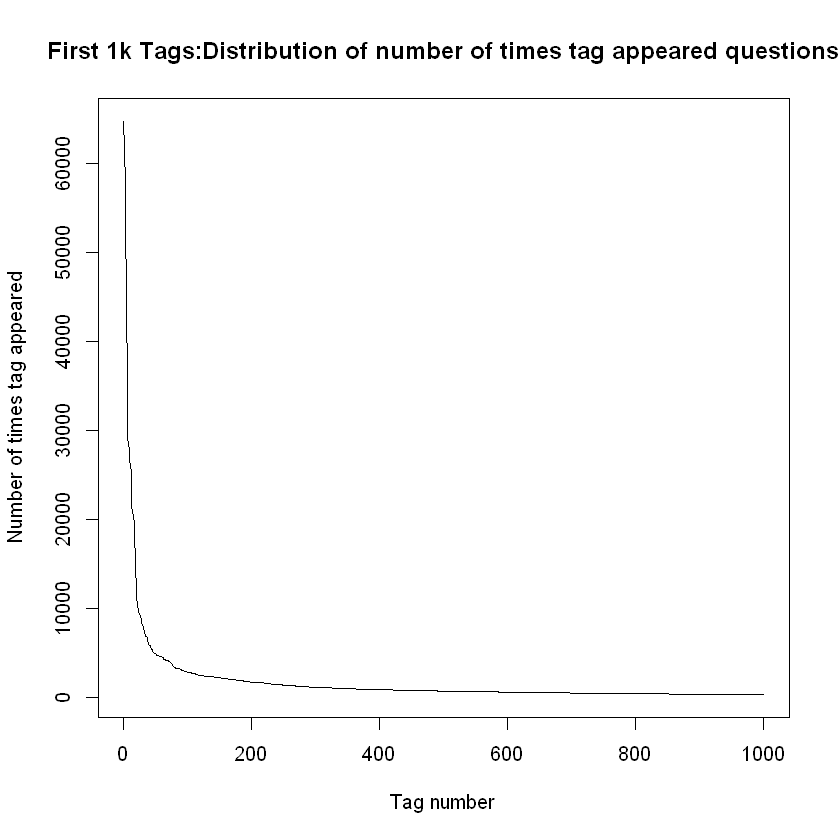

In [15]:

plot.default(fq_t$Freq[1:1000],type = "l",xlab = "Tag number",
             ylab = "Number of times tag appeared",
             main="First 1k Tags:Distribution of number of times tag appeared questions")

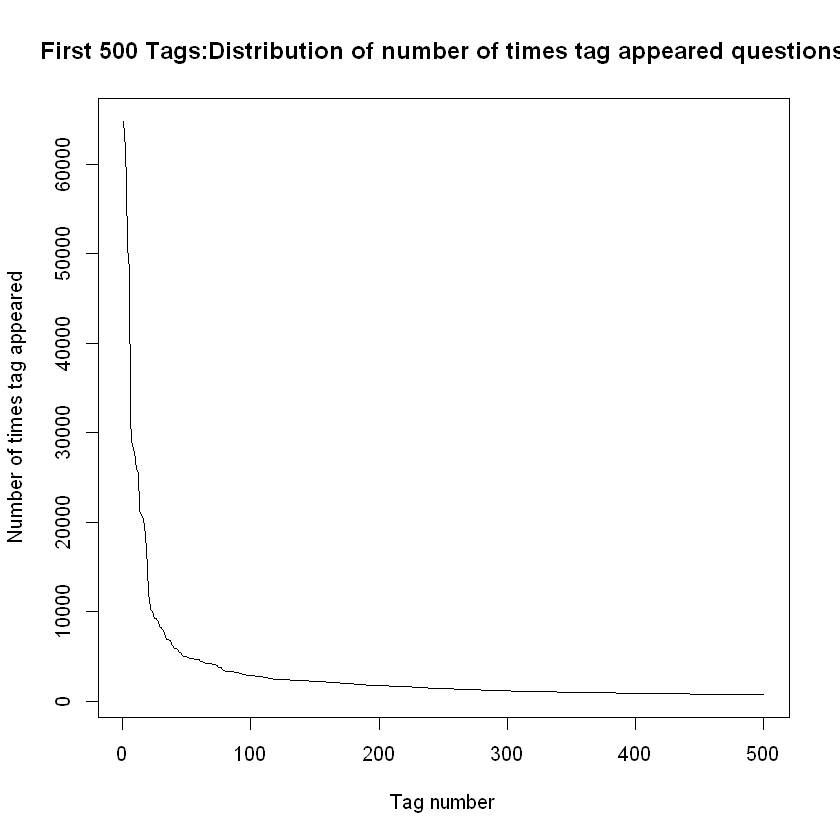

In [16]:

plot.default(fq_t$Freq[1:500],type = "l",xlab = "Tag number",
             ylab = "Number of times tag appeared",
             main="First 500 Tags:Distribution of number of times tag appeared questions")


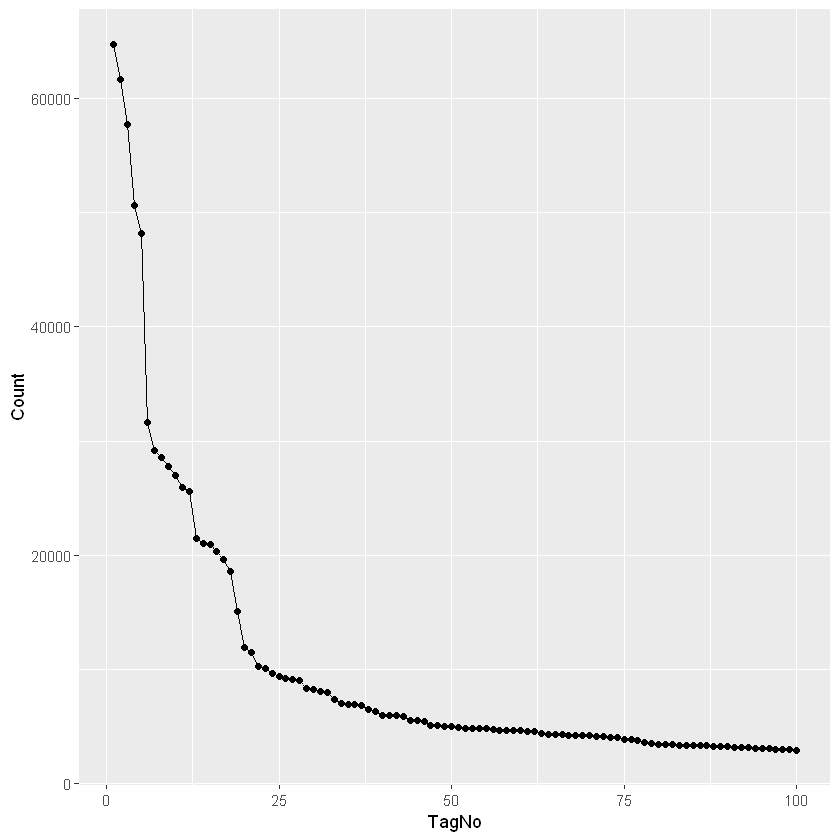

In [22]:

# Basic line plot with points

fq_100<- data.frame(TagNo=1:100,Count=fq_t$Freq[1:100])
ggplot(data=fq_100, aes(x=TagNo, y=Count, group=1)) +
  geom_line()+
  geom_point()

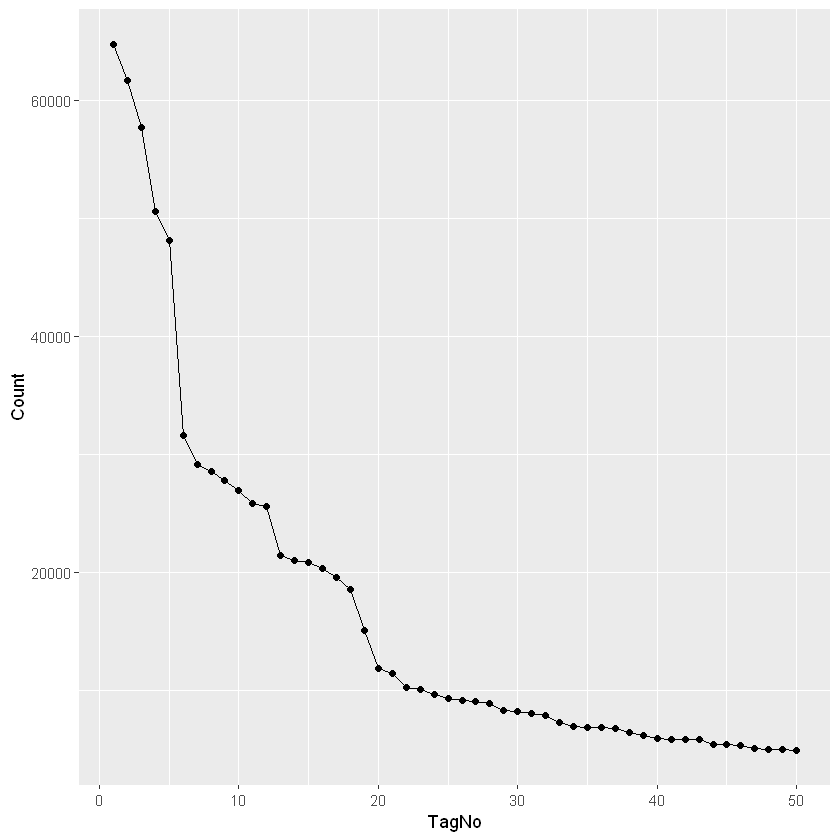

In [21]:
  fq_50<- data.frame(TagNo=1:50,Count=fq_t$Freq[1:50])
ggplot(data=fq_50, aes(x=TagNo, y=Count, group=1)) +
           geom_line()+
           geom_point()

In [21]:
  # Store tags greater than 10K in one list

(fq_5k<-fq_t[fq_t$Freq >5000,])
(fq_10k<-fq_t[fq_t$Freq >10000,])

dim(fq_5k)
dim(fq_10k)

,Var1,Freq
14951,java,64770
22515,php,61712
15025,javascript,57722
1010,android,50630
15396,jquery,48180
3609,c++,31664
24032,python,29141
14604,iphone,28567
1834,asp.net,27784
19398,mysql,26999


,Var1,Freq
14951,java,64770
22515,php,61712
15025,javascript,57722
1010,android,50630
15396,jquery,48180
3609,c++,31664
24032,python,29141
14604,iphone,28567
1834,asp.net,27784
19398,mysql,26999


[1] 48  2

[1] 23  2

# Tags Per Question

In [20]:
#Observations:
#   
# There are total 34 tags which are used more than 5000 times.
# 19 tags are used more than 10000 times.
# Most frequent tag (i.e. c) is used 77161 times.
# Since some tags occur much more frequently than others ,
# Micro-averaged F1-Score is the appropriate metrix for this problem


tags_per_ques<-unlist(lapply(df$Tags,function(x) wordcount(x, sep = " ", count.function = sum)))


print(paste("Maximum number of tags per question:", max(tags_per_ques)))
print(paste("Minimum number of tags per question:",min(tags_per_ques)))
print(paste("Avg. number of tags per question:",((sum(tags_per_ques)*1.0)/length(tags_per_ques))))


[1] "Maximum number of tags per question: 5"
[1] "Minimum number of tags per question: 1"
[1] "Avg. number of tags per question: 2.88777869861867"


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


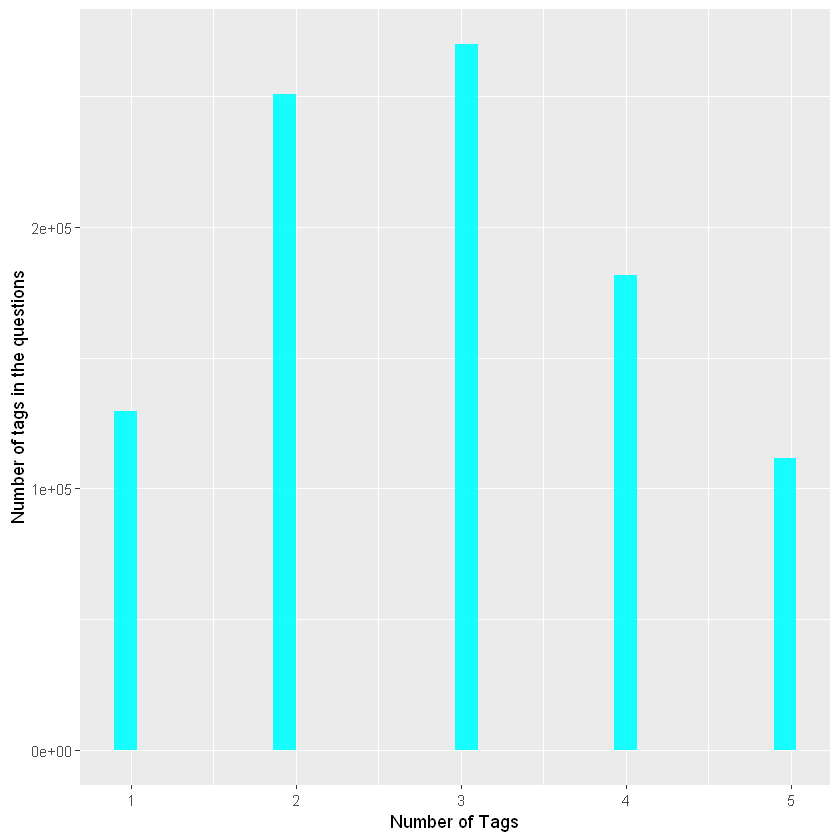

In [23]:

tags_per_ques<-data.frame(tags_per_ques)
ggplot(tags_per_ques,aes(tags_per_ques))+
  geom_histogram(alpha=0.9,fill="#00FFFF")+ylab("Number of tags in the questions")+xlab("Number of Tags")




Observations:
  
1. Maximum number of tags per question: 5
2. Minimum number of tags per question: 1
3. Avg. number of tags per question: 2.899
4. Most of the questions are having 2 or 3 tags




# Most Frequent Tags

In [37]:
#install.packages('wordcloud2', repos='http://cran.us.r-project.org')
library(IRdisplay)
library(leaflet)
library(htmlwidgets)

ptbl<-wordcloud2::wordcloud2(fq_t,backgroundColor = "black",color='random-dark')

saveWidget(ptbl, 'demo.html', selfcontained = FALSE)
display_html('<iframe src="demo.html"></iframe>')

In [25]:
fq_t1<-fq_t[1:20,]
fq_t1

,Var1,Freq
14951,java,64770
22515,php,61712
15025,javascript,57722
1010,android,50630
15396,jquery,48180
3609,c++,31664
24032,python,29141
14604,iphone,28567
1834,asp.net,27784
19398,mysql,26999


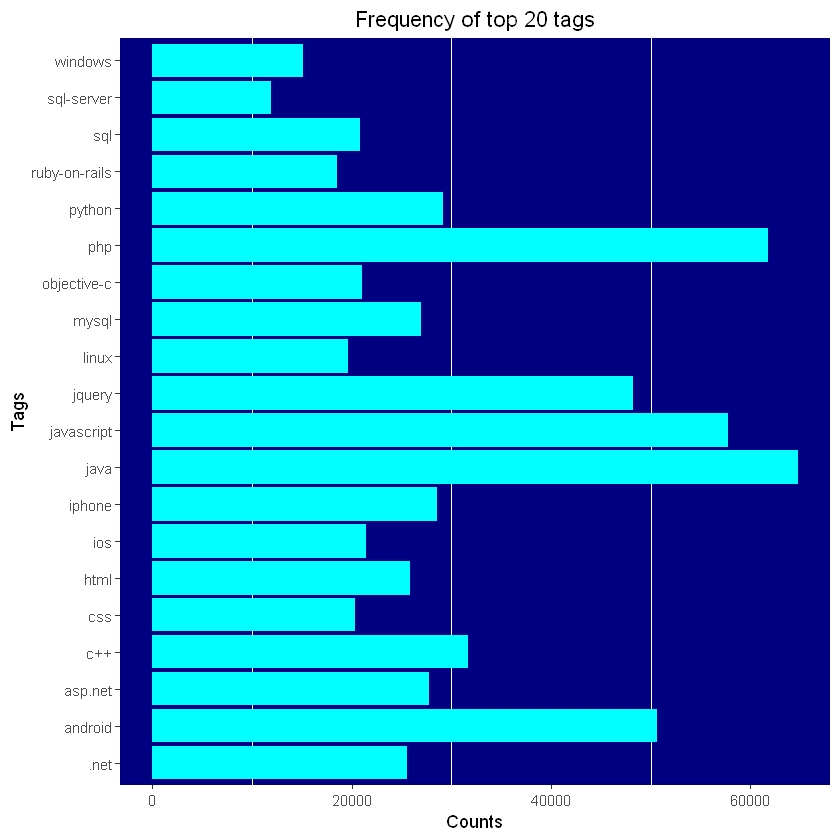

In [27]:

#Observations:
#A look at the word cloud shows that "c#", "java", "php", "asp.net", "javascript", "c++" are some of the most frequent tags.


fq_t1%>%
  ggplot() +
  geom_col(aes(Var1,Freq),fill="#00FFFF") +
  theme(legend.position = "none", 
        plot.title = element_text(hjust = 0.5),
        panel.grid.major = element_blank()) +
  xlab("Tags") + 
  ylab("Counts") +
  ggtitle("Frequency of top 20 tags") +
  coord_flip()+
  theme(   
    plot.background = element_rect(),    # Background of the entire plot
    
    panel.background = element_rect("navy"))






Observations:
  
Majority of the most frequent tags are programming language.
java is the top most frequent programming language.
Android,Php, javascript and jquery are among the top most frequent used languages.




# Cleaning and preprocessing of Questions


Preprocessing
1. Sample 1M data points
2. Separate Code from Body
3. Remove Spcial characters from Question title and description (not in code)
4. Remove stop words (Except 'C')
5. Remove HTML Tags
6. Convert all the characters into small letters
7. Use SnowballStemmer to stem the words


In [81]:



df_clean <- function(x){ 
  x<- replace_abbreviation(x) 
  x<- replace_ordinal(x) 
  x<- replace_symbol(x) 
  x<-tolower(x)
  x = gsub("[[:punct:]]", " ", x)
  # remove numbers
  x = gsub("[[:digit:]]", "", x)
  # remove html links
  x = gsub("http\\w+", "", x)
  x<-stripWhitespace(x) 
  x<-removeWords(x,c(stopwords("en")))
  
  
  x<-stem_snowball(x, algorithm = "en")
  x<-gsub("<.*?>", "", x)
  x<- str_trim(x,side=c("both","left","right"))
  x<-stem_snowball(x, algorithm = "en")
  #x<-corpus::text_tokens(x,stemmer="en")
  #x<- tm:re,replace_number(x) 
  return(x) 
} 
 

   

remove_single_char<-function(x){
  for(i in 1:length(x)){
    for(j in 1:length(unlist(x[[i]]))){
      if(nchar(unlist(x[[i]][j]))==1 && unlist(x[[i]][j])!="c" && unlist(x[[i]][j])!="r" ){
        x[[i]][j]= " "
      }
    }
  }
  return(x)
}
  



df_title<- df$Title


df_title<-df_clean(df_title)
df_title<-remove_single_char(df_title)



dfa<-data.frame(question=unlist(df_title))
#head(dfa)
dfa<-cbind(dfa,Tags=df$Tags)
dfa<-as.data.frame(dfa)
write.csv(dfa,"preproc_dfa.csv")

In [83]:
head(dfa)


question,Tags
check uploaded file image without mime type,php image-processing file-upload upload mime-types
can prevent firefox closing press ctrl w,firefox
r error invalid type list variable,r matlab machine-learning
replace special characters url,c# url encoding
modify whois contact details,php api file-get-contents
setting proxy active directory environment,proxy active-directory jmeter
